Ce notebook propose une analyse du Dataset 2a de la BCI Competition, qui comporte quatre classes : left hand (main gauche), right hand (main droite), tongue (langue) et feet (pieds). L'objectif est d'observer l'évolution des matrices de covariance des signaux à travers le temp.

<h1> A propos des données </h1>
Cet ensemble de données se compose de données EEG provenant de 9 sujets. Le paradigme BCI basé sur des indices se composait de quatre tâches d'imagerie motrice différentes, à savoir l'imagination du mouvement de la main gauche (classe 1), de la main droite (classe 2), des deux pieds (classe 3) et de la langue (classe 4). Deux sessions ont été enregistrées pour chaque sujet, à des jours différents. Chaque session est composée de 6 séquences séparées par de courtes pauses. Une séquence se compose de 48 essais (12 pour chacune des quatre classes possibles), ce qui donne un total de 288 essais par session.

Les sujets étaient assis dans un fauteuil confortable devant un écran d'ordinateur. Au début d'un essai (t = 0 s), une croix de fixation apparaissait sur l'écran noir. De plus, un bref signal sonore d'avertissement était présenté. Après deux secondes (t = 2 s), un indice sous forme d'une flèche pointant vers la gauche, la droite, le bas ou le haut (correspondant à l'une des quatre classes de la main gauche, de la main droite, du pied ou de la langue) apparaissait et restait sur l'écran pendant 1,25 s. Cela incitait les sujets à effectuer la tâche d'imagerie motrice désirée. Aucune rétroaction n'était fournie. Les sujets étaient invités à effectuer la tâche d'imagerie motrice jusqu'à ce que la croix de fixation disparaisse de l'écran à t = 6 s.

Vingt-deux électrodes Ag/AgCl (avec des distances inter-électrodes de 3,5 cm) ont été utilisées pour enregistrer l'EEG ; le montage est présenté dans la figure 3 à gauche. Tous les signaux ont été enregistrés de manière monopolaire, avec le mastoïde gauche comme référence et le mastoïde droit comme terre. Les signaux ont été échantillonnés à 250 Hz et filtrés en bande passante entre 0,5 Hz et 100 Hz. La sensibilité de l'amplificateur a été réglée à 100 μV. Un filtre coupe-bande supplémentaire à 50 Hz a été activé pour supprimer le bruit de ligne.

<h1>Importation et Prétraitement des Données :</h1> Les données de la première session du premier sujet sont chargées à partir du Dataset 2a. Les segments correspondant à chaque classe (left hand, right hand, tongue, feet) sont extraits de la  première session du premier run du premier sujet.

In [8]:
import mne
import moabb
from moabb.datasets import BNCI2014_001

In [9]:
import numpy as np

In [10]:
dataset = BNCI2014_001()

In [11]:
print(dataset.subject_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [12]:
dataset.subject_list = [1]

In [13]:
sessions = dataset.get_data(subjects=[1])

In [14]:
subject = 1
session_name = "0train"
run_name = "0"
raw = sessions[subject][session_name][run_name]

In [15]:
subject = 1
session_name = "0train"
run_name = "1"
raw_1 = sessions[subject][session_name][run_name]

In [16]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, Cz, C2, C4, C6, CP3, ...
 chs: 22 EEG, 3 EOG, 1 Stimulus
 custom_ref_applied: False
 dig: 25 items (3 Cardinal, 22 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 26
 projs: []
 sfreq: 250.0 Hz
>


In [17]:
print(raw.get_data().shape)

(26, 96735)


In [18]:
print(raw.get_data())

[[ 3.41796875e-07 -6.34765625e-06 -1.80664062e-06 ...  2.92968750e-07
  -6.34765625e-06 -9.71679687e-06]
 [ 2.44140625e-07 -7.95898437e-06 -7.17773437e-06 ...  4.88281250e-08
  -5.12695312e-06 -7.17773437e-06]
 [-3.22265625e-06 -1.04980469e-05 -8.15429687e-06 ... -3.07617188e-06
  -9.71679687e-06 -1.39648438e-05]
 ...
 [ 2.05078125e-05  7.81250000e-06  1.36718750e-05 ...  4.58984375e-05
   3.85742188e-05  3.95507813e-05]
 [ 5.85937500e-06 -4.88281250e-06 -4.88281250e-07 ... -4.39453125e-06
  -4.39453125e-06 -1.07421875e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


Using matplotlib as 2D backend.


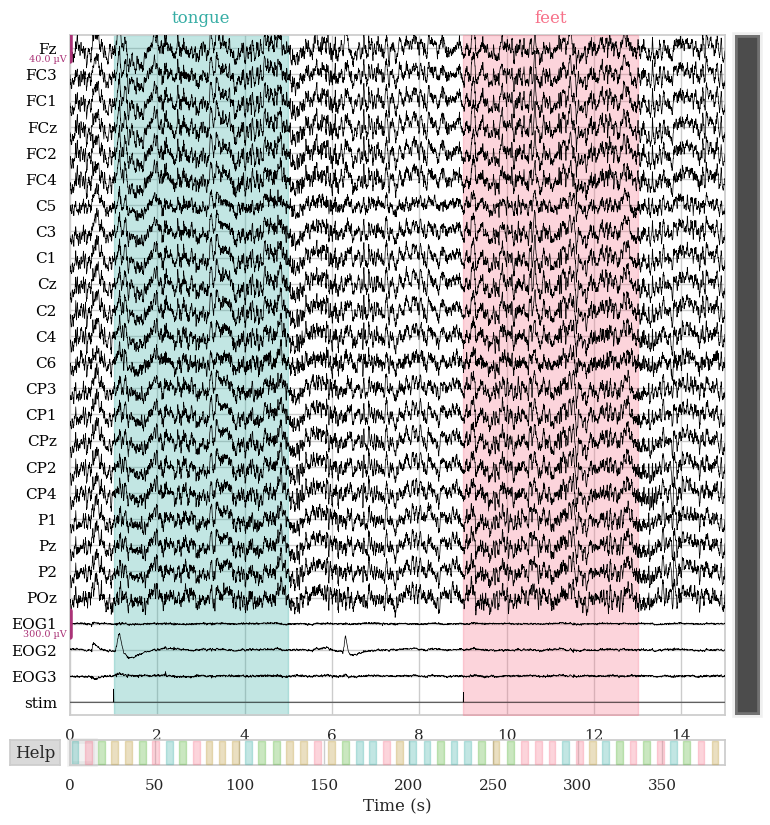

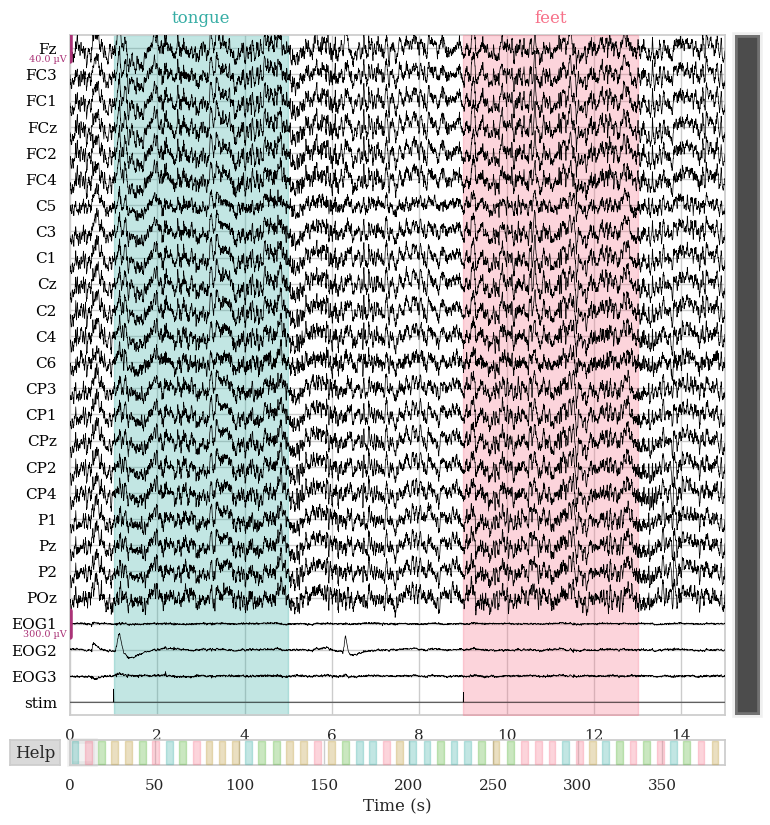

In [19]:
raw.plot(duration=15, n_channels=26)

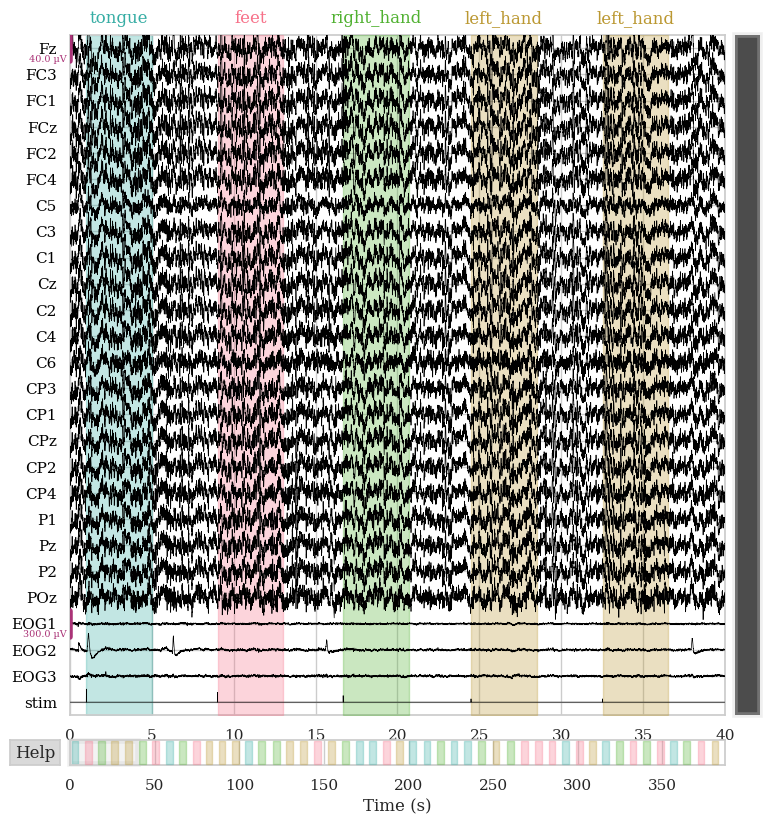

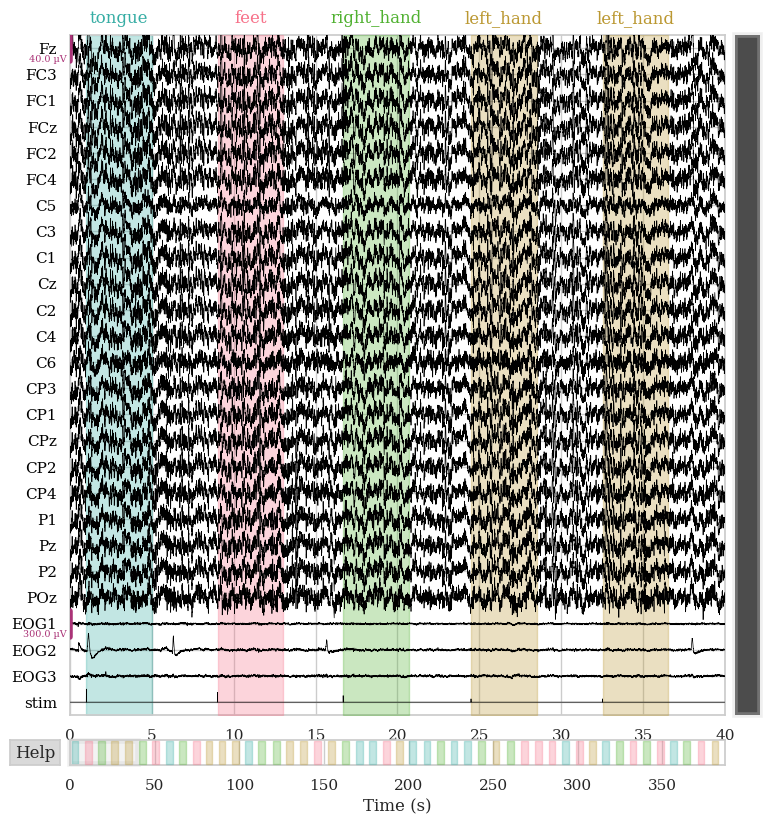

In [20]:
raw.plot(duration=40, n_channels=26)

<h1>Calcul de la Covariance :</h1> 
À partir des données EEG, la covariance est calculée toutes les deux secondes. Cela permet de capturer les relations linéaires entre les différentes électrodes à travers le temps.
Il existe plusieur méthode dans mne pourle calcule de la covariance parmis ces méthodes il  y'a la méthode empirique ainsi que ‘diagonal_fixed’, ‘shrunk’, ‘oas’, ‘ledoit_wolf’, ‘factor_analysis’, ‘shrinkage’. Dans cette exemple je vais utiliser la méthode empirique.

<h1>Enregistrement des Matrices de Covariance :</h1> Chaque matrice de covariance est sauvegardée dans une varible figure_list ainsi qu'au format JPG pour créer un GIF animé illustrant l'évolution de la covariance dans le temps.

In [21]:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt

In [23]:
import matplotlib.pyplot as plt
def afficher_matrice(matrice, titre=""):
    """
    Afficher une matrice sous forme d'image.

    Args:
    - matrice : np.array
        La matrice à afficher.
    - titre : str
        Le titre du graphique.
    """
    x = ['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz']
    y = ['Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1', 'Pz', 'P2', 'POz']

    fig = plt.figure()
    plt.imshow(matrice, cmap='Reds', interpolation='nearest')
    plt.xticks(np.arange(len(x)), x)
    plt.yticks(np.arange(len(y)), y)
    plt.colorbar()
    plt.title(titre)
    plt.xlabel("Electrodes")
    plt.ylabel("Electrodes")
    #plt.show()
    return fig

In [30]:
print(type(cov_segment.data))

<class 'numpy.ndarray'>


In [24]:
import matplotlib.pyplot as plt
import mne

# Créer une liste pour stocker les figures
figures_list = []
cov_list = []
label_list = []

# Définir les paramètres de temps
tmin = 0  # Temps minimum initial
tmax = 2  # Temps maximum initial
step = 2  # Pas de décalage en secondes
num_segments = 75  # Nombre total de segments

# Charger les données brutes
# Remplacez raw par votre objet raw réel
# raw = mne.io.read_raw_fif('chemin_vers_votre_fichier_raw.fif')

# Boucle pour créer les figures
for i in range(num_segments):
        # Calculer le temps de début et de fin pour chaque segment
        segment_tmin = tmin + i * step
        segment_tmax = tmax + i * step
        
        # Extraire le segment de données brut correspondant
        raw_segment = raw.copy().crop(tmin=segment_tmin, tmax=segment_tmax)
        
        # Calculer la covariance pour ce segment
        cov_segment = mne.compute_raw_covariance(raw_segment, tmin=0, tmax=2, method='empirical')
        # Récupérer le label correspondant à ce segment
        events = mne.events_from_annotations(raw_segment)
        if events[0].size != 0:
                label = list(events[1].keys())[0]
                label_list.append(label)
        else:
                label = "No label"
                label_list.append(label)

        
        # Créer la figure de covariance pour ce segment
        #fig_cov, _ =  mne.viz.plot_cov(cov_segment, raw_segment.info, show_svd=False, show=False)
        fig_cov = afficher_matrice(cov_segment.data, f"{label_list[i]} {segment_tmin} secondes")
        fig_cov.savefig(f"images/cov_figure_{i}.jpg")
        
        # Ajouter la figure à la liste
        figures_list.append(fig_cov)
        cov_list.append(cov_segment)
        
        fig_cov.clf()
    




Using up to 10 segments
Number of samples used : 500
[done]


Used Annotations descriptions: ['tongue']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['tongue']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['tongue']
Using up to 10 segments
Number of samples used : 500
[done]
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['feet']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['feet']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['feet']
Using up to 10 segments
Number of samples used : 500
[done]
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['right_hand']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['right_hand']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['right_hand']
Using up to 10 s

C:\Users\ABC\AppData\Local\Temp\ipykernel_20328\3090256970.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['right_hand']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['right_hand']
Using up to 10 segments
Number of samples used : 500
[done]
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['feet']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['feet']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['feet']
Using up to 10 segments
Number of samples used : 500
[done]
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['tongue']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['tongue']
Using up to 10 segments
Number of samples used : 500
[done]
Used Annotations descriptions: ['tongue']
Using up to 10 segments
Number of samples used : 500
[done]
Us

In [ ]:

frames = np.stack([iio.imread(f"images/cov_figure_{i}.jpg") for i in range(75)], axis = 0)

C:\Users\ABC\AppData\Local\Temp\ipykernel_14256\1755593989.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = np.stack([iio.imread(f"images/cov_figure_{i}.jpg") for i in range(75)], axis = 0)


In [ ]:
duration_per_frame = 2000
iio.mimwrite('covariance2.gif', frames,duration=duration_per_frame)